In [182]:
from sympy import *
from dtumathtools import *
from IPython.display import Markdown
import networkx as nx
init_printing(use_latex="mathjax")
mdisplay = lambda x: display(Markdown(x))
nx_args={'with_labels':True, 'node_color':"white", 'edgecolors':"black", 'node_size':400}

# Opgave 1

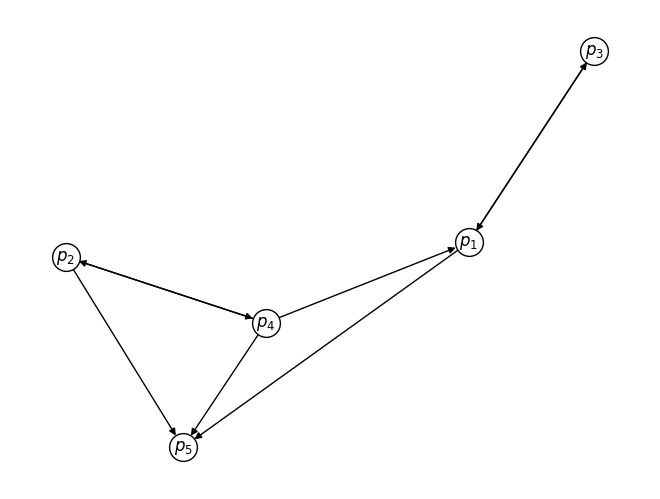

In [183]:
p1,p2,p3,p4,p5 = symbols('$p_1:6$')
V1 = {p1, p2, p3, p4, p5}
E1 = {(p1,p3), (p1,p5),(p2,p4),(p2,p5),(p3,p1),(p4,p1),(p4,p2),(p4,p5)}
W = nx.DiGraph()
W.add_nodes_from(V1, color="white")

W.add_edges_from(E1)
nx.draw(W,**nx_args)

# Opgave 2

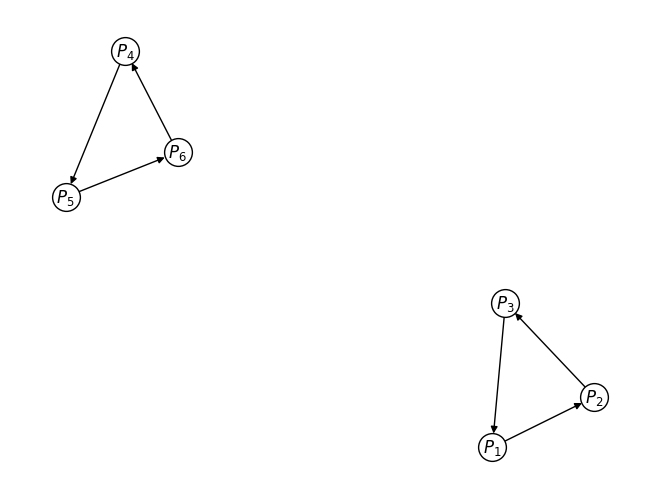

In [184]:
p1,p2,p3,p4,p5,p6 = symbols('$P_1:7$')
V2 = {p1, p2, p3, p4, p5, p6}
E2 = {(p1,p2), (p2,p3),(p3,p1),(p4,p5),(p5,p6),(p6,p4)}
W2 = nx.DiGraph()
W2.add_nodes_from(V2, color="white")

W2.add_edges_from(E2)
nx.draw(W2,**nx_args)

# Opgave 3


Jo flere komponenter der er i et netværk, jo svære bliver det at finde en specifik node. Faktisk er det helt umuligt at finde frem til en node i et komponent, hvis man er i et andet komponent til at begynde med. Der er altså ingen links fra den ene hjemmeside til den anden. 

# Opgave 4

In [185]:
W1 = {p1: {p3, p5}, p2: {p5, p4}, p3: {p1}, p4: {p1, p5, p2}, p5: {}}
W2 = {p1: {p2}, p2: {p3}, p3: {p1}, p4: {p5}, p5: {p6}, p6: {p4}}

Det kan tjekkes om en node i graphen ikke linker til andrer noder, ved at tjekke om nodens value i adjacency listen er den tomme mængde $\emptyset$

# Opgave 5

In [188]:
import numpy as np

# Input: n og k er ikke-negative heltal
# Output: web er en dictionary med n nøgler.
# Værdien af hver nøgle er en liste, der er en delmængde af nøglerne.
def make_web(n,k,kmin=0):
    assert(k < n), "k skal være mindre end n (da man ikke kan linke til sig selv)"
    assert(kmin <= k), "kmin skal være mindre end eller lig med k"
    keys = list(symbols(f"$p_0:{n}$")) 
    web = dict()
    
    for j in keys:
        numlinks = np.random.randint(kmin, k)
        key_choices = keys.copy()
        key_choices.remove(j)
        web[j] = set(np.random.choice(key_choices, numlinks))
    
    return web

print(make_web(4,3, 1))

{$p_0$: {$p_3$, $p_2$}, $p_1$: {$p_0$, $p_3$}, $p_2$: {$p_1$}, $p_3$: {$p_0$}}


# Opgave 6


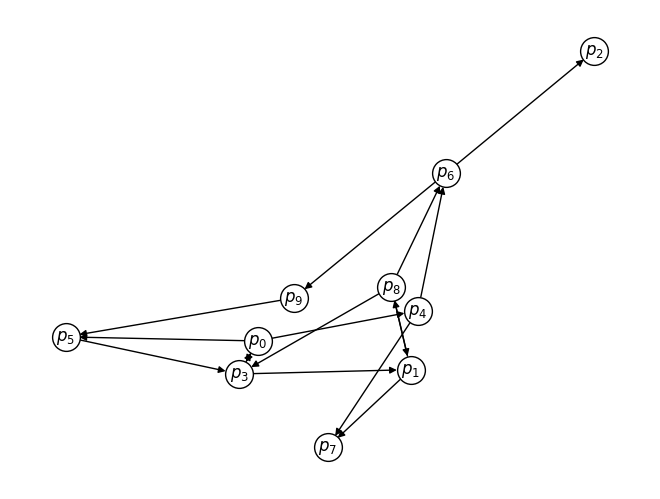

In [196]:
import matplotlib.pyplot as plt
    # Input: netværk som dictionary
    # Output: Netværk visualiseret som graf
def visualize_graph(web : dict):
    
    digraph = nx.DiGraph()
    digraph.add_nodes_from(web.keys())

    for start_node in web.keys():
        for end_node in web[start_node]:
            digraph.add_edge(start_node, end_node)
    
    plt.figure()
    nx.draw(digraph, **nx_args)

    plt.show()


visualize_graph(make_web(10, 5, 0))

In [ ]:
testWeb = make_web(4,3,1)
print(testWeb)
print([(element, link) for link in [element for element in testWeb]])

{$p_0$: {$p_3$, $p_2$}, $p_1$: {$p_2$}, $p_2$: {$p_1$}, $p_3$: {$p_1$}}
[$p_0$, $p_1$, $p_2$, $p_3$]
